# Testes Estatísticos: Normalidade, Hipóteses e Comparação entre Grupos

Neste notebook, vamos abordar diferentes tipos de testes estatísticos aplicados a conjuntos de dados simulados, com foco especial em um exemplo realista envolvendo as notas de estudantes de três turmas diferentes.

Os tópicos cobertos incluem:

1. Como realizar um **teste de normalidade** em uma amostra de dados.
2. Como aplicar um **teste de hipótese para a média** de uma amostra (teste t).
3. Como aplicar um **teste de hipótese não paramétrico** (teste de Wilcoxon) quando a normalidade não é atendida.
4. Como utilizar o **teste de Levene** para verificar a homogeneidade das variâncias entre grupos.
5. Como aplicar a **ANOVA** ou o **teste de Kruskal-Wallis**, dependendo do resultado do teste de Levene, para verificar se há diferença significativa nas médias das notas entre as turmas.

Utilizaremos as bibliotecas `scipy`, `numpy`, `pandas`, `matplotlib` e `seaborn` para ilustrar os conceitos e realizar as análises estatísticas.


## Cenário I: Avaliação de um Suplemento Cognitivo

Imagine que uma empresa farmacêutica está testando a eficácia de um novo suplemento alimentar que promete melhorar o desempenho cognitivo de estudantes.

Para isso, foi aplicada uma bateria de testes de memória em 100 estudantes **após 30 dias de uso** do suplemento. O objetivo é verificar se a pontuação média obtida pelos alunos **é diferente** da média histórica de 52 pontos (sem uso de suplemento).

Com base nesses dados, realizaremos testes estatísticos para tirar conclusões sobre a eficácia do suplemento.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style="whitegrid")

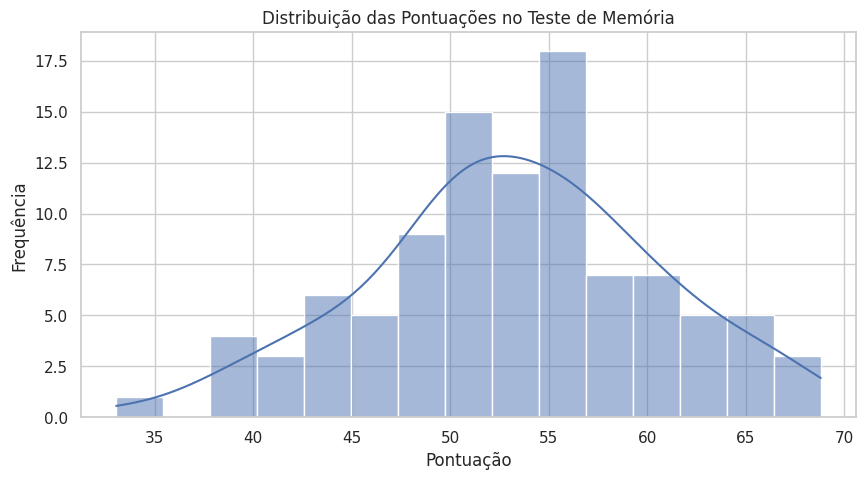

In [2]:
# Simular os dados da pontuação dos estudantes após o uso do suplemento
np.random.seed(42)
pontuacoes = np.random.normal(loc=54, scale=8, size=100)  # média ligeiramente maior que 52

# Visualizar a distribuição
plt.figure(figsize=(10, 5))
sns.histplot(pontuacoes, kde=True, bins=15)
plt.title('Distribuição das Pontuações no Teste de Memória')
plt.xlabel('Pontuação')
plt.ylabel('Frequência')
plt.show()

## Teste de Normalidade

Vamos verificar se os dados seguem uma distribuição normal utilizando o teste de Shapiro-Wilk.

In [5]:
# Teste de Shapiro-Wilk
stat, p = stats.shapiro(pontuacoes)
print(f'Estatistica do teste: {stat:.4f}, valor-p: {p:.4f}')

if p > 0.05:
  print("Os dados seguem uma distribuição normal (falha em registrar h0)")
else:
  print("Os dados NÃO seguem uma distribuição normal (rejeta se h1)")

Estatistica do teste: 0.9899, valor-p: 0.6552
Os dados seguem uma distribuição normal (falha em registrar h0)


## Teste de Hipótese para uma Amostra

Queremos verificar se a **média da pontuação** após o uso do suplemento é diferente da média histórica (52 pontos).

In [7]:
# Teste t para uma amostra

media_hipotetica = 52

t_stats, p_val = stats.ttest_1samp(pontuacoes, media_hipotetica)

print(f'Estatistica do teste: {t_stats:.4f}, p_val: {p_val:.4f}')

if p_val > 0.05:
  print("A media da amostra é igual a média histórica (52) (falha em registrar h0)")
else:
  print("A media da amostra é diferente a média histórica (rejeta se h0)")



Estatistica do teste: 1.6093, p_val: 0.1107
A media da amostra é igual a média histórica (52) (falha em registrar h0)


## Teste Não Paramétrico: Wilcoxon

Caso os dados não sigam distribuição normal, aplicamos o teste de Wilcoxon para verificar se a **mediana** é diferente de 52.

In [ ]:
# Teste de Wilcoxon (para dados simétricos e não normais)

w_stat, w_p_val = stats.wilcoxon(pontuacoes - media_hipotetica)

print(f'Estatistica do teste: {t_stats:.4f}, p_val: {w_p_val:.4f}')

if w_p_val > 0.05:
  print("A media da amostra é igual a média histórica (52) (falha em registrar h0)")
else:
  print("A media da amostra é diferente a média histórica (rejeta se h0)")

## Cenário II: Comparação de Notas em Três Turmas

Imagine que três turmas de uma escola utilizaram métodos diferentes de ensino ao longo do semestre:

- **Turma A**: Método tradicional.
- **Turma B**: Método com aulas interativas.
- **Turma C**: Método com ensino híbrido (online + presencial).

Queremos verificar se há **diferença significativa nas médias das notas** entre essas turmas utilizando **ANOVA**.

Mas antes disso, precisamos **verificar se as variâncias das notas são semelhantes**, pois isso é uma **premissa do teste ANOVA**. Para isso, utilizaremos o **teste de Levene**.


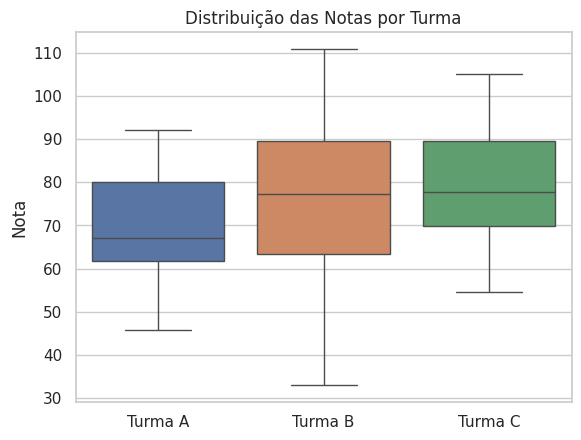

In [9]:
# Gerar os dados simulando as notas de cada turma
np.random.seed(123)
turma_a = np.random.normal(70, 10, 30)  # método tradicional
turma_b = np.random.normal(75, 15, 30)  # método interativo
turma_c = np.random.normal(80, 12, 30)  # ensino híbrido

# Boxplot para visualizar a distribuição
df_turmas = pd.DataFrame({'Turma A': turma_a, 'Turma B': turma_b, 'Turma C': turma_c})
sns.boxplot(data=df_turmas)
plt.title("Distribuição das Notas por Turma")
plt.ylabel("Nota")
plt.show()

### Escolha do Teste de Comparação de Médias

Dependendo do resultado do teste de Levene:

- Se as variâncias forem semelhantes (**p > 0.05**), usamos o teste **ANOVA**.
- Se as variâncias forem significativamente diferentes (**p ≤ 0.05**), usamos o teste **de Kruskal-Wallis**, que é não paramétrico.


In [11]:
# Teste de Levene - verifica se as variâncias são iguais

l_stats, l_p_val = stats.levene(turma_a, turma_b, turma_c)

print(f'Estatísttica de Levene: {l_stats} P valor: {l_p_val}')

if l_p_val > 0.05:
  print("As turmas tem variancia semelhante (falha em registrar h0)")
else:
  print("As turmas se diferem na variancia (rejeta se h0)")


Estatísttica de Levene: 2.832737505542732 P valor: 0.06429191906572802
As turmas tem variancia semelhante (falha em registrar h0)


In [12]:
# Verificação condicional com base no valor-p de Levene

if l_p_val > 0.05:
  f_stat, p_anova = stats.f_oneway(turma_a, turma_b, turma_c)

  print(f'Estatísttica de ANOVA: {f_stat} P valor: {p_anova}')

  if p_anova > 0.05:
    print("Os métodos de ensino não apresentam diferenças significativas (falha em registrar h0)")
  else:
    print("Os métodos apresentam diferenças significativas (rejeta-se h0)")

else:
  k_stats, k_val = stats.kruskal(turma_a, turma_b, turma_c)
  print(f'Estatísttica de Kruskal-Wallis: {k_stats} P valor: {k_val}')

  if k_val > 0.05:
    print("Os métodos de ensino não apresentam diferenças significativas (falha em registrar h0)")
  else:
    print("Os métodos apresentam diferenças significativas (rejeta-se h0)")

Estatísttica de ANOVA: 2.84414739777174 P valor: 0.0636069641698792
Os métodos de ensino não apresentam diferenças significativas (falha em registrar h0)
